<a href="https://colab.research.google.com/github/vmulmale/AI-Enabled-IT-Service-Ticketing-tool/blob/Develop_Vivek/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Enabled IT Ticketing Service Tool 

# 1. PROBLEM STATEMENT 

In any of the IT industry, incident management plays an important role in delivering quality and timely support to its customers across the globe.

The incidents are generally created by various stakeholders like end users, vendors, IT users, etc. They might not have right information as to which team the ticket should go to. Hence, to imporve and retain customer satisfaction, it is very important that the ticket is assigned to the right group of people for faster and approproiate resolution. In Many Organizations this is still a manual process. There re few problems with the manual process:
1. Manual assignment of incidents is time consuming
2. It requires human efforts
3. There may bemistakes due to human errors and resource consumption is carried out ineffectively because ofthe misaddressing
4. Manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service

L1 / L2 needs to spend time to review Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum 25–30% of incidents needs to be reviewed for SOPs before ticket assignment).  

15 mins are being spent for SOP review for each incident. Minimum of 1 FTE effort needed only for incident assignment to L3 teams.  

During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups.  

Around 25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups 

During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service and loss of business.




# 2. OBJECTIVE

We are building an AI solution which will enable organizations to classify incidents to the right functional group by implementing the best suited machine learning model and leading to customer satisfaction. 

Guided by AI, organizations can reduce the resolution time and focus on more productive tasks. This will overcome and save time with below losses:

1. Time latency sue to review of SOPs before assigning to right functional group 
2. Incorrect assignments to functional groups
3. #ToDo ( Include figures for losses and revenue ) --> to be checked by Gloria 

# 3. SOLUTION

ToDo ( Add the different approches taken )

## 3.1 EDA

## 3.1.1 Install the required libraries

In [ ]:
pip install sweetviz

In [ ]:
!pip install pandas-profiling==2.7.1

### 3.1.2 Importing necessary libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from pandas_profiling import ProfileReport
from wordcloud import WordCloud, STOPWORDS 
import ftfy
from google_trans_new import google_translator
import pickle

%matplotlib inline


ModuleNotFoundError: ignored

## 3.1.2 Import the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [42]:
# Fetch the data from input data stored in Goolge drive
incidents_data = pd.read_excel('/content/drive/MyDrive/AIML/projects/CAPSTONE_PROJECT/input_data.xlsx')

In [43]:
# Check the first 5 rows of data
incidents_data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


## 3.1.3 Visualizing and analysing the data 

3.1.3.1 Report visualization using SweetViz

                                             |          | [  0%]   00:00 -> (? left)

Report Incidents_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



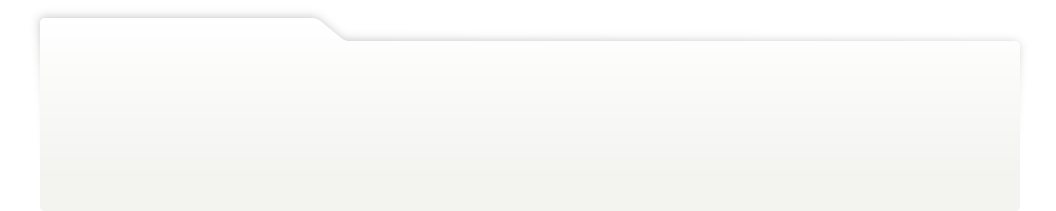
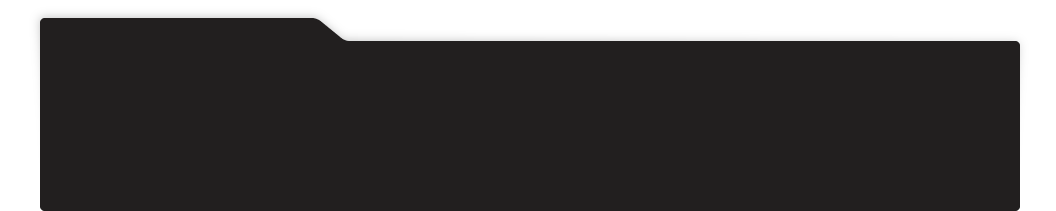
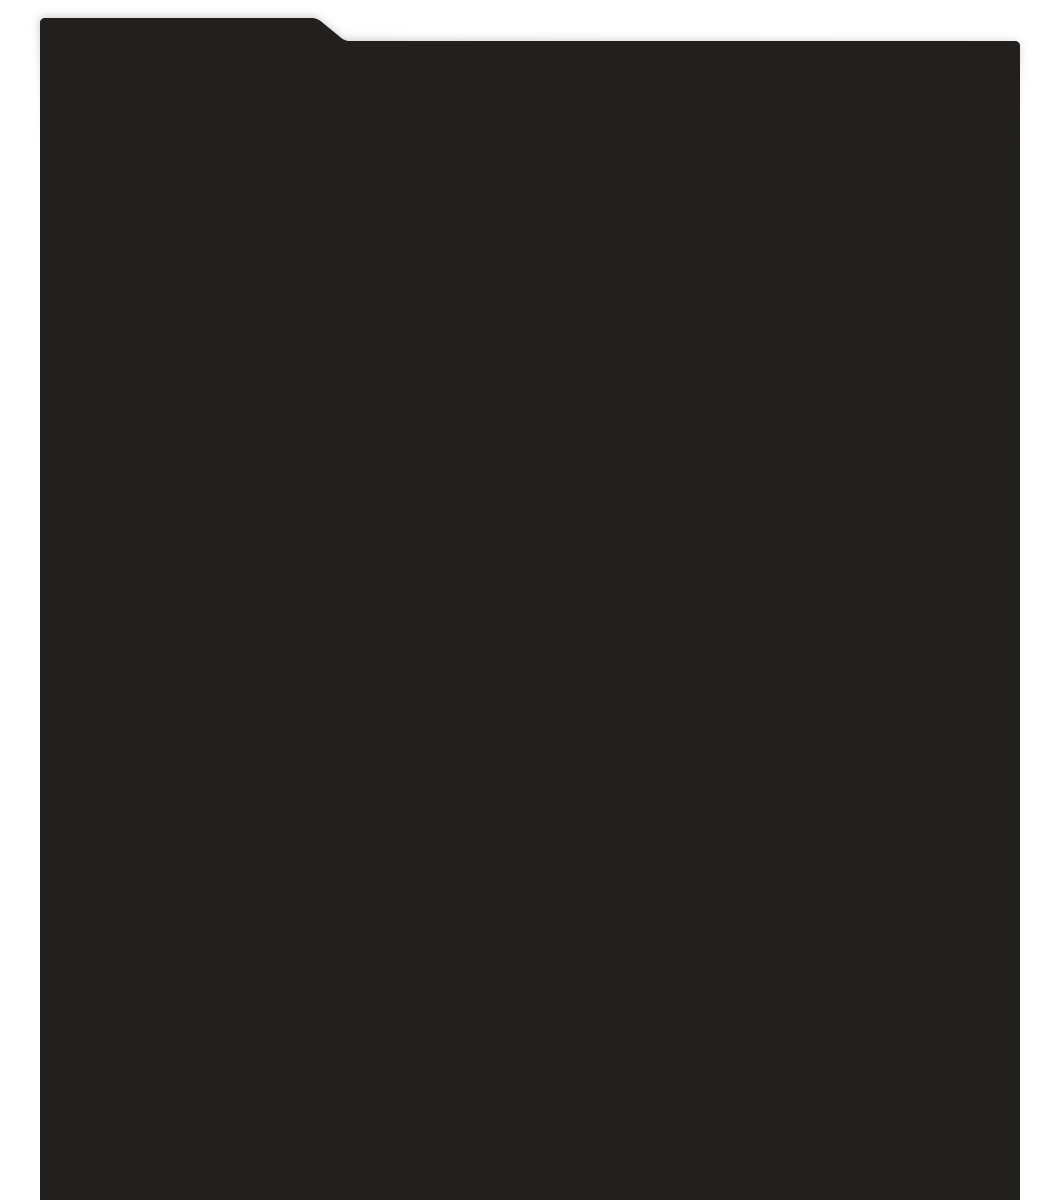
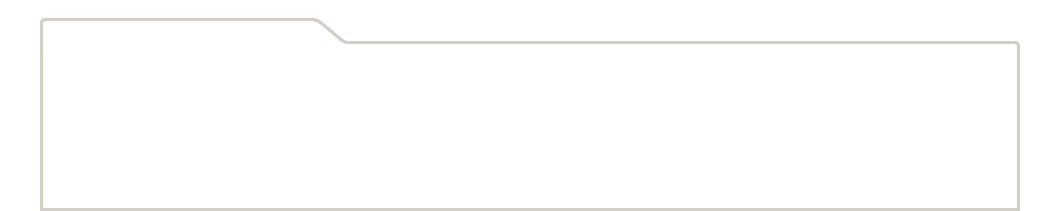
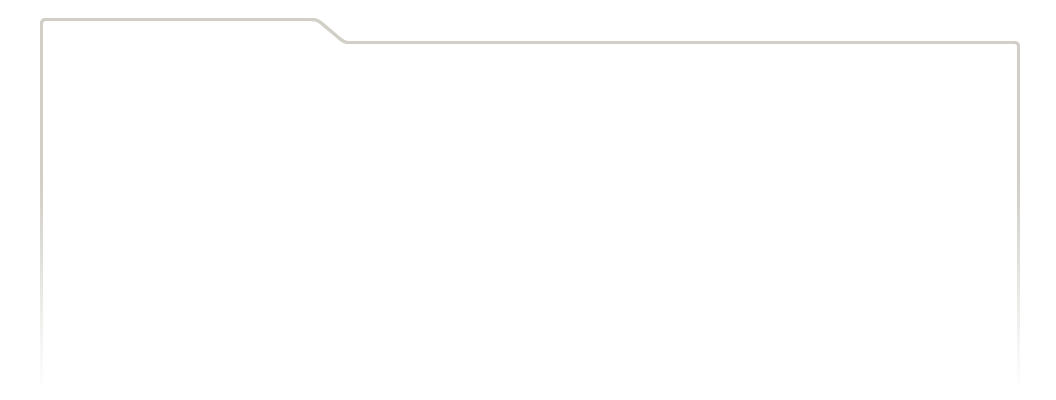
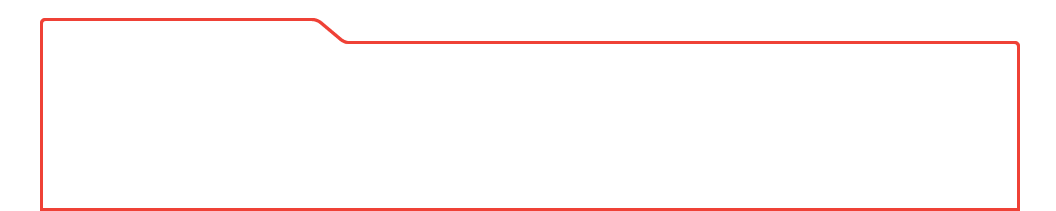
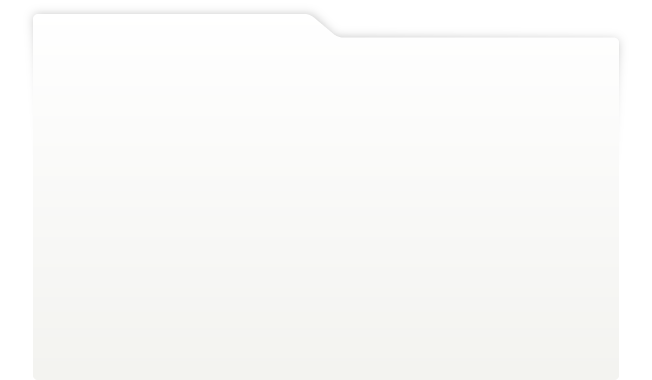
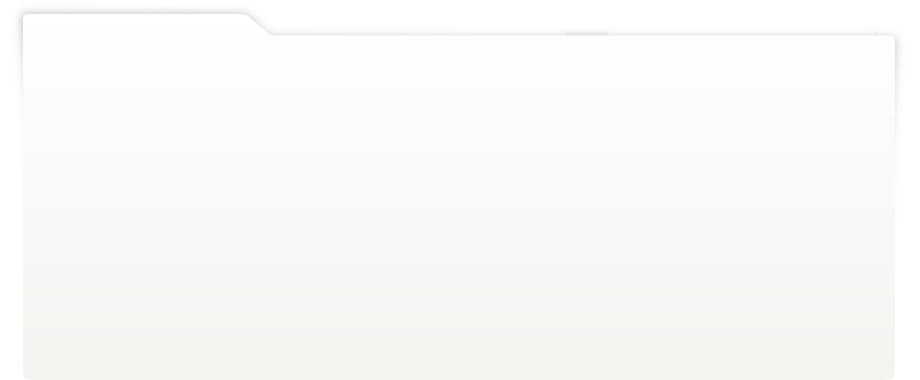
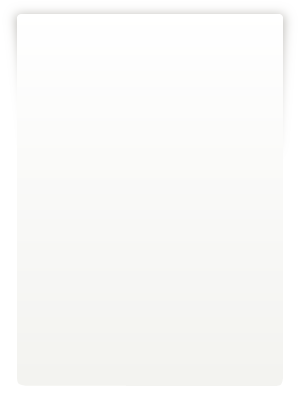
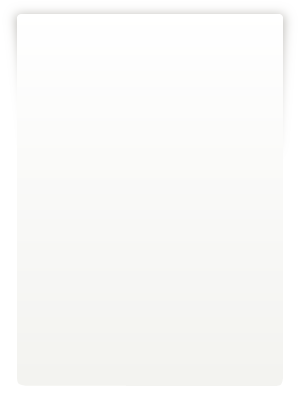
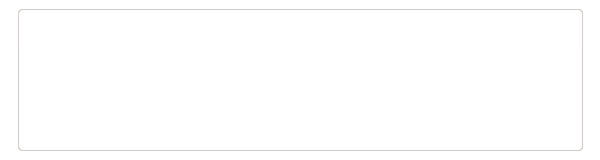
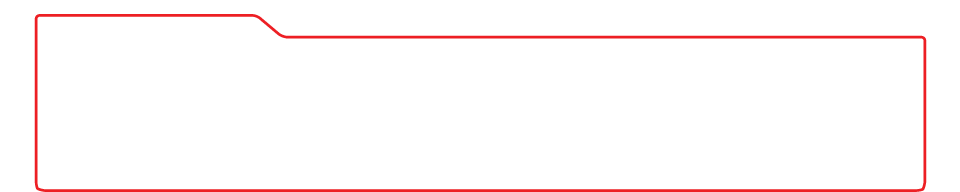
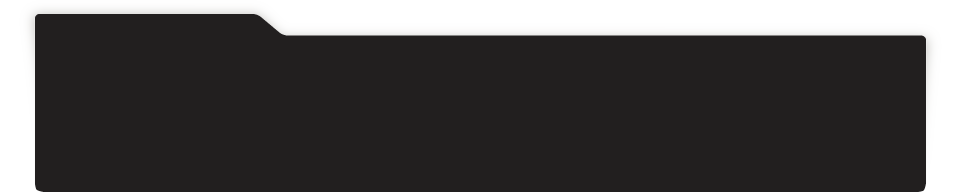
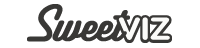
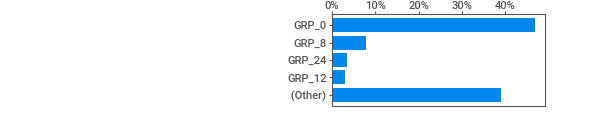
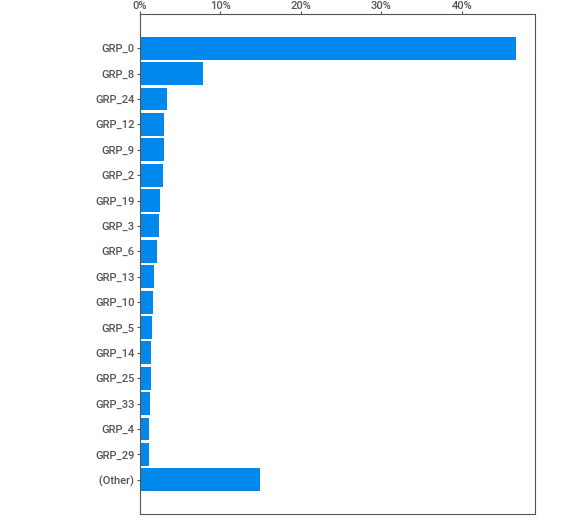
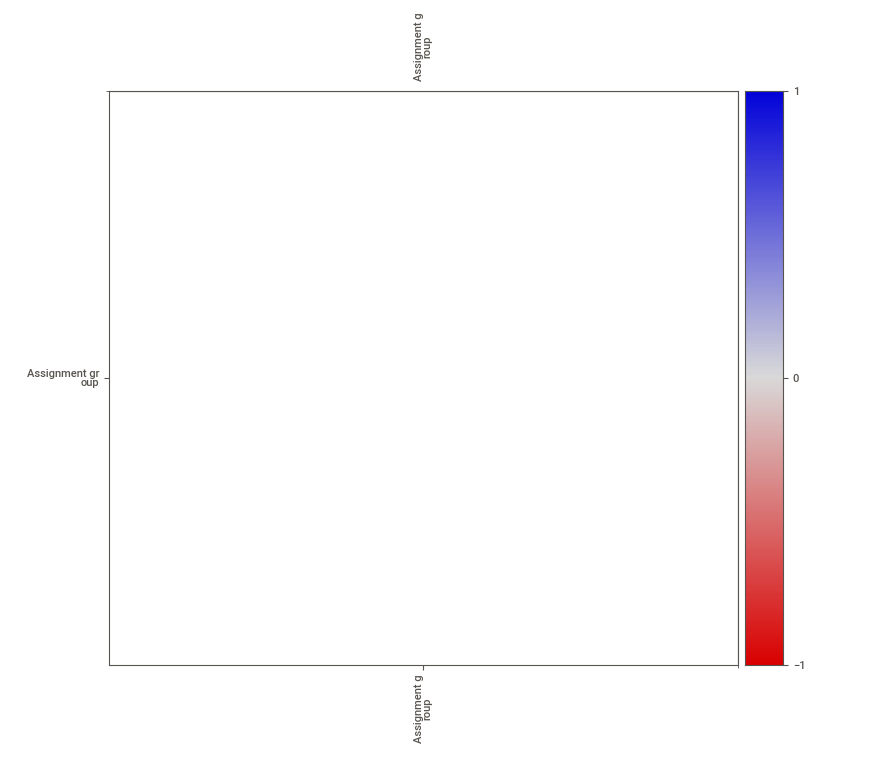
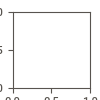

In [ ]:
incidents_report = sv.analyze(incidents_data)
#display the report
incidents_report.show_html('Incidents_sweetviz_report.html')
incidents_report.show_notebook()

3.1.3.2 Report visualization using Pandas Profiling

In [ ]:
incident_report = ProfileReport(incidents_data, html={'style': {'full_width' : True}})
incident_report.to_file(output_file='Incidents_pandas_profiling_report.html')
incident_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

3.1.3.3 Observations from SweetViz and Pada Profiling reports above

From Above two reports we have below onservations: 
1. Shape of the data - { Rows : 8500, Columns : 4 }
2. Total features - 3
    
    2.1. Short Description - Text

    2.2. Description - Text

    2.3. Caller - Text
3. Target Column - 1
  
    3.1 Assignment Group - Categorical
4. There are 84 duplicate records in total. We see further below about specific columns and strtegy to handle duplicates.
5. We shall also check if we need to create new features as I think all the columns are important. May be we can also find some hidden patterns as below: 
          A. Common Issues -> user can be trained if possible 
          B. Common Caller -> May be user needs training or help with hardware or software
          C. #ToDo To find if issue is controllable or not --> Check if possible .
          D. To find if customer is happy with service or needs further imporvement and assistance

Now let's look at individual feature: 
1. **Short description** 
  
   A. Total values - 8492 ( > 99% )
   
   B. Missing values - 8 ( < 1% )

   C. Distinct values - 7481 (88%)

   D. Mostly occuring value - password reset ( 0.4% )
   
   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 159

   G. It contains:
    
        Characters -> Lowercase Letter, Punctuation, 
        Uppercase Letter, Decimal Number, 
        Math Symbol, Math_Symbol, 
        Modifier Symbol, Other_Number, 
        Other_Symbol, Currency_Symbol

        Scripts -> Common(ASCII) and Latin

  H. With this we can say that we will also have to translate based on the scripts as part of data pre processing
2. **Description** 
  
   A. Total values - 8499 ( > 99% )
   
   B. Missing values - 1 ( < 1% )

   C. Distinct values - 7817 ( 92% )

   D. Mostly occuring value - it shows "the" ( 0.7% ) but we shall check this after removal of stop words. But we consider the next which is windows password reset ( 0.3% )

   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 13001

   G. It contains:
    
        Characters -> Lowercase Letter, Punctuation, 
        Uppercase Letter, Decimal Number, 
        Math Symbol, Math_Symbol, 
        Modifier Symbol, Other_Number, 
        Other_Symbol, Currency_Symbol

        Scripts -> Common(ASCII) and Latin

  H. With this we can say that we will also have to translate based on the scripts as part of data pre processing 
3. **Caller** 
  
   A. Total values - 8500 ( 100% )
   
   B. Missing values - no missing value
 
   C. Distinct values - 2950 ( 35% )

   D. Mostly occuring value - bpctwhsn kzqsbmtp (10%)

   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 30

   G. It contains:
    
        Characters -> Lowercase Letter, Space_Separator, 
        Uppercase Letter, Connector_Punctuation

        Scripts -> Common(ASCII) and Latin

  H. With this we can say that we will also have to work on the stopwords removal and also translating based on the scripts
4. **Assignment Group** 
  
   A. Total values - 8500 ( 100% )
   
   B. Missing values - no missing value 

   C. Distinct values - 74 ( < 1% )

   D. Mostly occuring value - GRP_0 (47% ~ nearly half of the data --> Hence very high biased data, so strategy to be employed to reduce the bias here)

   E. We can also see the number of times each value is being repeated

   G. This indicates we can merge few assignment groups with smaller percentage to reduce overall number of categories. 


3.1.3.4 Other Observations

1. There are duplicates which needs to be tackled
2. There are mojibake texts in the description and short description which needs to be processed 
3. There are texts belonging to different languages which needs translations
4. There are email ids, blank spaces, dates, numbers which needs to be processed
5. There are missing values to be treated


### 3.1.3 Further Data Analysis

In [44]:
# Print the counts for unique values of short description
incidents_data['Short description'].value_counts()

password reset                                                                                                 38
windows password reset                                                                                         29
account locked in ad                                                                                           24
windows account locked                                                                                         23
erp SID_34 account unlock                                                                                      19
                                                                                                               ..
expense report issue : getting alert in expense report. screenshots attached.                                   1
sales order 36112960 generated a 10/13 delivery date despite the order being markhtyed for 2nd day air.why?     1
engineering tool not working                                                            

In [ ]:
def show_word_cloud(column):
    
    comment_words = ' '

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

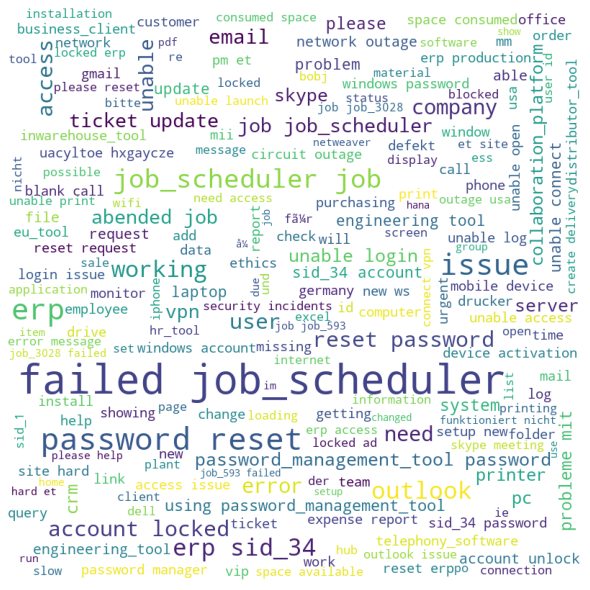

In [ ]:
#Word cloud for short description

wordcloud_short_desc = show_word_cloud(incidents_data['Short description'])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_short_desc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

#ToDo Observation from word cloud

In [45]:
# Print the counts for unique values of Description
incidents_data["Description"].value_counts()

the                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            56
windows password reset                                                                                                                                                                                                                                                                                                                                                                                                

In [46]:
#Word cloud for description

wordcloud_desc = show_word_cloud(incidents_data['Description'])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_desc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

NameError: ignored

In [ ]:
# Print the counts for unique values of Caller
incidents_data["Caller"].value_counts()

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
                    ... 
whykbjdq gfqlnysm      1
pvimkcfw sarxkfvj      1
jghqolyd cydthpjv      1
ncwfeytj tumlheoi      1
mqjdyizg amhywoqg      1
Name: Caller, Length: 2950, dtype: int64

In [ ]:
#ToDo pie chart for top 10 callers

In [ ]:
# Print the counts for unique values of Assignment Group
incidents_data['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_73       1
GRP_61       1
GRP_70       1
GRP_67       1
GRP_35       1
Name: Assignment group, Length: 74, dtype: int64

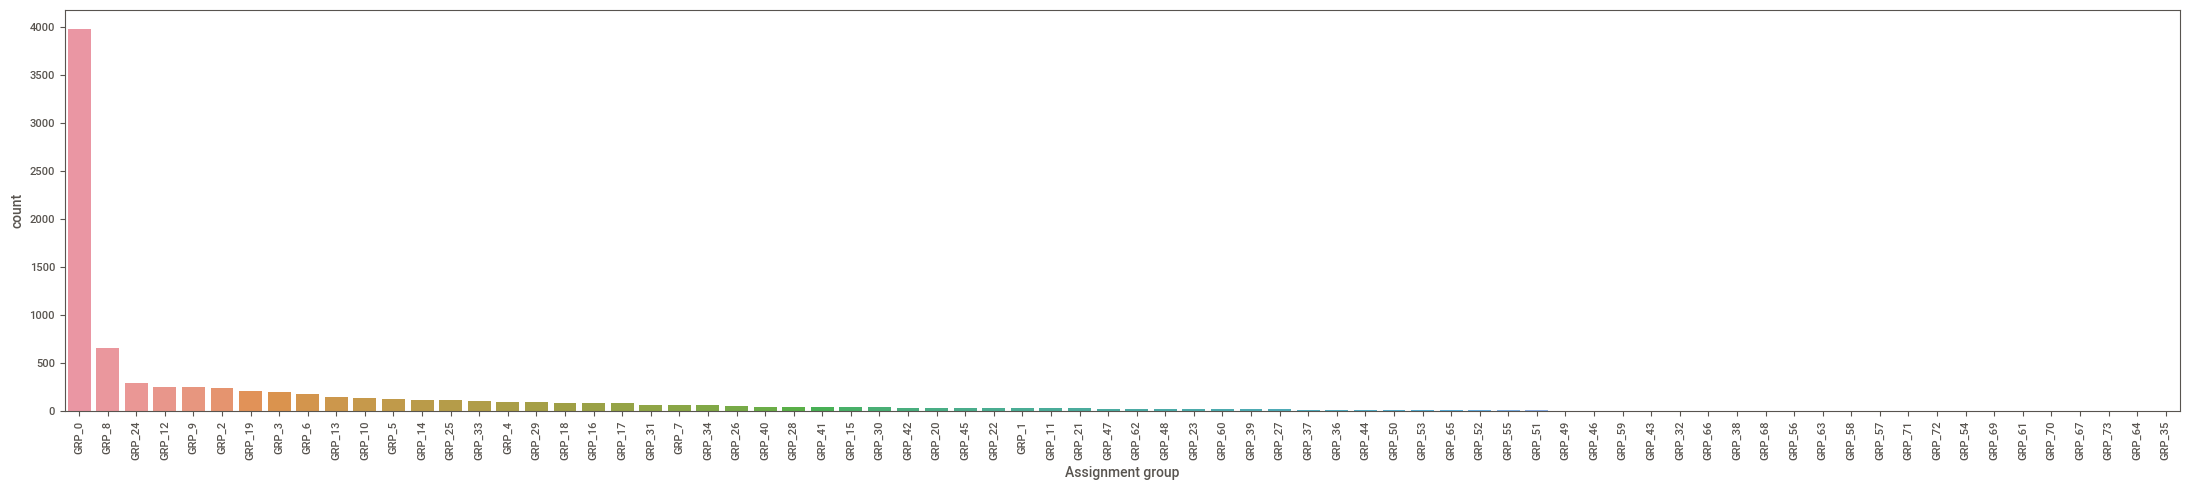

In [ ]:
#Visualizing imbalance in the target class to find what all are smallest groups that can be merged to reduce total number of classification classes.
plt.figure(figsize=(22,5))
sortOrder = incidents_data['Assignment group'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(x='Assignment group', data=incidents_data,order=sortOrder)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
ticket_selected_grp = incidents_data.groupby(['Assignment group']).filter(lambda x: len(x) <=30)
print("No of Assignment groups with less than or equal to 30 tickets", ticket_selected_grp['Assignment group'].nunique())


No of Assignment groups with less than or equal to 30 tickets 40


We shall see the assignment group distribution 

In [47]:
ticket_excluded_grp = ['GRP_0','GRP_8']
ticket_excluded_grp.extend(ticket_selected_grp['Assignment group'].unique())

ticket_excluded_grps = incidents_data[~incidents_data['Assignment group'].isin(ticket_excluded_grp)]

ticket_assigned_grp = pd.DataFrame(ticket_excluded_grps.groupby('Assignment group').size(),columns=['Count']).reset_index()


NameError: ignored

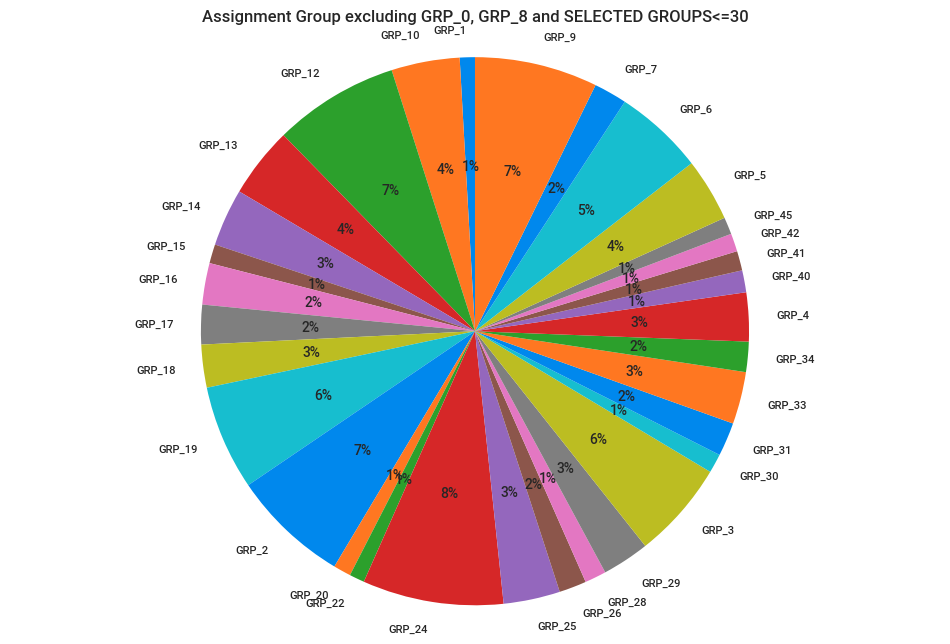

In [ ]:
plt.figure(figsize=(12,8))
plt.pie(ticket_assigned_grp.Count,labels=ticket_assigned_grp['Assignment group'],autopct='%1.0f%%',startangle=90)
plt.title("Assignment Group excluding GRP_0, GRP_8 and SELECTED GROUPS<=30")
plt.axis('equal')
plt.show()


In [ ]:
incidents_data_counts = incidents_data['Assignment group'].value_counts().reset_index()

In [ ]:
incidents_data_counts.head()

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252


We can use above figure to define the ranges to see which groups have tickets in below range. This will help us understand the most important groups to focus on. The ranges can be as below: 
1. 1 ticket
2. 2 tickets
3. 3-8 tickets
4. 9-14 tickets
5. 15-30 tickets
6. 31-50 tickets
7. 51-100 tickets
8. 101-200 tickets
9. 201-300 tickets
10. more than 300 tickets

In [ ]:
ticket_bins = pd.DataFrame(columns=['No. of tickets','No. of Assignment groups'])
_1_ticket = {'No. of tickets':'1 ticket','No. of Assignment groups':len(incidents_data_counts[incidents_data_counts['Assignment group'] == 1])}
_2_tickets = {'No. of tickets':'2 tickets',
              'No. of Assignment groups':len(incidents_data_counts[incidents_data_counts['Assignment group'] == 2 ])}
_3_8_tickets = {'No. of tickets':' 3-8 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 2 )& (incidents_data_counts['Assignment group'] < 9 )])}
_9_14_tickets = {'No. of tickets':' 9-14 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 8)& (incidents_data_counts['Assignment group'] < 15 )])}
_15_30_tickets = {'No. of tickets':' 15-30 ticket',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 14)& (incidents_data_counts['Assignment group'] < 31 )])}      
_31_50_tickets = {'No. of tickets':' 31-50 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 30)& (incidents_data_counts['Assignment group'] < 51)])}      
_51_100_tickets = {'No. of tickets':' 51-100 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 50)& (incidents_data_counts['Assignment group'] < 101)])}   
_101_200_tickets = {'No. of tickets':' 101-200 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 100)& (incidents_data_counts['Assignment group'] < 201)])}
_201_300_tickets = {'No. of tickets':' 201-300 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 200)& (incidents_data_counts['Assignment group'] < 301)])}                                                       
_301_tickets = {'No. of tickets':' > 301 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 300)])}
# Append row to the bins
ticket_bins = ticket_bins.append([_1_ticket,_2_tickets,_3_8_tickets,
                          _9_14_tickets,_15_30_tickets,_31_50_tickets,_51_100_tickets,_101_200_tickets,_201_300_tickets,_301_tickets], ignore_index=True)

print(ticket_bins)

     No. of tickets No. of Assignment groups
0          1 ticket                        6
1         2 tickets                        5
2       3-8 tickets                       13
3      9-14 tickets                        4
4      15-30 ticket                       12
5     31-50 tickets                       10
6    51-100 tickets                        9
7   101-200 tickets                        8
8   201-300 tickets                        5
9     > 301 tickets                        2


There are total of 40 Assignment groups which have tickets less than  or equal to 30. Lets see the if we can combine the assignment groups having few tickets and reduce the number of classes for classification. 

For this we shall also check if the same kind of issues are handled by other assignment groups in further analysis with which will be a deciding factor to merge the classes.

Let's see the assignment group distribution for the range of ticksts we see above in the form of pie chart

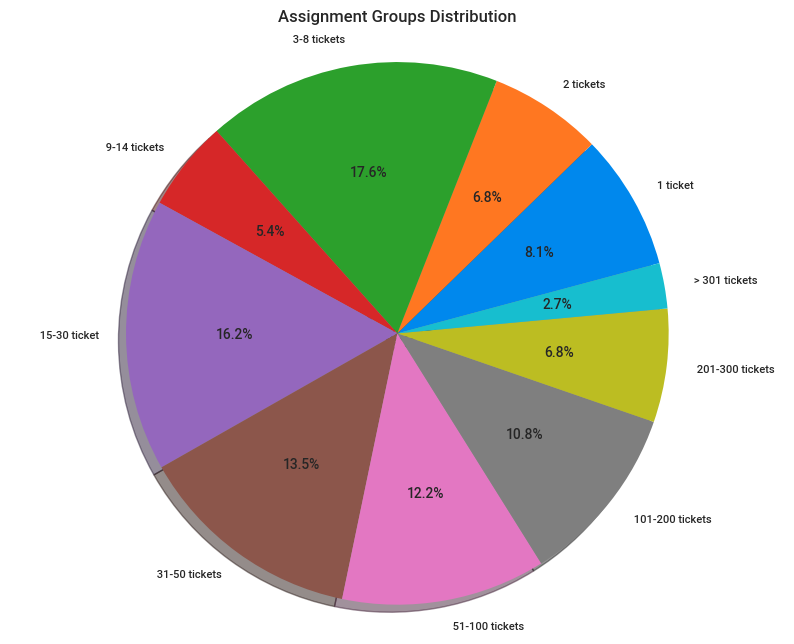

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(ticket_bins['No. of Assignment groups'],labels=ticket_bins['No. of tickets'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

In [ ]:
ticket_selected_grp = incidents_data.groupby(['Assignment group']).filter(lambda x: len(x) <=2)
print("No of Assignment groups with less than or equal to 2 tickets", ticket_selected_grp['Assignment group'].nunique())


No of Assignment groups with less than or equal to 2 tickets 11


In [ ]:
assignment_group_ticket_counts = incidents_data_counts[incidents_data_counts['index'].isin(ticket_selected_grp['Assignment group'])]

In [ ]:
assignment_group_ticket_counts

,index,Assignment group
63,GRP_57,2
64,GRP_71,2
65,GRP_72,2
66,GRP_54,2
67,GRP_69,2
68,GRP_64,1
69,GRP_73,1
70,GRP_61,1
71,GRP_70,1
72,GRP_67,1


## 3.2 DATA PREPROCESSING 

## 3.3 FEATURE ENGINEERING

In [ ]:
pip install google_trans_new

## 3.4 CHARACTERS TRANSLATION

In [31]:
dataframeIndexName = incidents_data[incidents_data['Short description'].str.count(r'^[åç‘æäÄ].*')>0]

In [33]:
dataframeIndexName.head(55)

,Short description,Description,Caller,Assignment group
164,æ’¤å›ž: ticket_no1564867 -- comments added,\n\nreceived from: abcdri@company.com\n\nwindy...,tycludks cjofwigv,GRP_0
488,çœ‹ä¸è§a3 çš„æ–‡ä»¶å¤¹ï¼ˆ\\HostName_17\teams...,çœ‹ä¸è§a3 çš„æ–‡ä»¶å¤¹ï¼ˆ\\HostName_17\teams...,hlrmufzx qcdzierm,GRP_12
1081,ç”¨å‹è½¯ä»¶é—®é¢˜,"æ‰“å¼€å·²å…³é—­çš„é”€å”®è®¢å•æ—¶ï¼Œæ˜¾ç¤º""ä¸...",bwstnmjh yqumwrsk,GRP_48
1178,ç”µè¯æœºæ²¡æœ‰å£°éŸ³,ç”µè¯æœºæ²¡æœ‰å£°éŸ³,cyjlqdwm kywiuosn,GRP_30
1279,"æ›´æ›å¯†ç¢¼å¾Œ, company connectå¯ç™»å…¥,ä½†ç...","æ›´æ›å¯†ç¢¼å¾Œ, company connectå¯ç™»å…¥,ä½†ç...",zhpwcdea cboefuis,GRP_0
1554,ç­”å¤: ticket_no1559458 : wireless guest acce...,\n\nreceived from: krnzfoct.mnjbuedp@gmail.com...,krnzfoct mnjbuedp,GRP_0
1568,ç”µè„‘æ— æ³•æ‰“å¼€ç½‘é¡µã€‚,å¼ å·¥æ‚¨å¥½ï¼\r\næˆ‘çš„ç”µè„‘è¿žæŽ¥å…¬å¸ç½‘...,tmufgokq qtzavows,GRP_31
1710,äº§å“ä¸Žä»“åº“å¯¹ä¸ä¸Š,äº§å“æ‰€åœ¨ä»“åº“å‡ºé”™ã€‚ st6p -100/+325 ...,tvykmlex hcawjigf,GRP_48
1711,å¼€æœºé»‘å±,ç”µè„‘å¯åŠ¨åŽé»‘å±ï¼Œä¸»æœºæ— æŠ¥è­¦,ofiglcaq hvcqtzel,GRP_48
1807,æ— æ³•åˆ›å»ºskypeä¼šè®®ï¼Œoutlook æ—¥åŽ†ä¸Šé¢...,æ— æ³•åˆ›å»ºskypeä¼šè®®ï¼Œoutlook æ—¥åŽ†ä¸Šé¢...,dqovxreg qswvlctg,GRP_31


In [10]:
pip install translate-api

     |████████████████████████████████| 61kB 3.4MB/s 
     |████████████████████████████████| 6.3MB 10.7MB/s 
  Created wheel for PyExecJS: filename=PyExecJS-1.5.1-cp37-none-any.whl size=14588 sha256=78e1cc59b4c002c1fa4f1bbbafaf5cd2614e25e8ca1319de10969407dda4248b
  Stored in directory: /root/.cache/pip/wheels/43/25/28/52dd7a6c691b1551e3d4482f3f16ef630cc9f59cae99cd33ba
Successfully built PyExecJS
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [12]:
pip install ftfy

     |████████████████████████████████| 71kB 4.2MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-cp37-none-any.whl size=41916 sha256=2d6e76eb6b8ee903a11d35c154a2284c791af0c2f9b86a8c2db208a5d40901c2
  Stored in directory: /root/.cache/pip/wheels/99/2c/e6/109c8a28fef7a443f67ba58df21fe1d0067ac3322e75e6b0b7
Successfully built ftfy


In [23]:
pip install googletrans

     |████████████████████████████████| 61kB 3.5MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 1.0MB 10.1MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp37-none-any.whl size=15737 sha256=e7af255f720b0cc06591ff8bad09b2c32f0627a0a3f753435e25eec50cee0c10
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
Successfully built googletrans


In [26]:
!pip install google_trans_new

In [48]:
incidents_data.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

In [52]:
incidents_data = incidents_data.sort_values(by='Assignment group',axis=0,ascending=True,inplace=False)
incidents_data["IncidentDescriptionText"] = (incidents_data["Short description"] + incidents_data["Description"]).astype("str")
# incidents_data = incidents_data[["Short description","Description"]]

incidents_data.head(50)


In [53]:
incidents_data.head(50)

,Short description,Description,Caller,Assignment group,IncidentDescriptionText
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue-verified user details.(employee# &...
4655,unable to login to skype,unable to login to skype,wpgxtnks opizcfle,GRP_0,unable to login to skypeunable to login to skype
4654,removing another mail box from outlook,removing another mail box from outlook,rwhavckz drvxyihj,GRP_0,removing another mail box from outlookremoving...
4653,no response from other side : german call,no response from other side : german call,efbwiadp dicafxhv,GRP_0,no response from other side : german call no r...
4652,outlook not loading,outlook not loading,dqplrwoy cutpwjie,GRP_0,outlook not loadingoutlook not loading
4651,out of office for at least next 3 months. need...,out of office for at least next 3 months. need...,yawbtfjc krypjxnd,GRP_0,out of office for at least next 3 months. need...
4650,vpn access pc name : aidl8912285 user id : th...,vpn access pc name : aidl8912285,yzbqwpat fdjrctbu,GRP_0,vpn access pc name : aidl8912285 user id : th...
4658,unable to launch outlook,unable to launch outlook,bdgklrnj phwmkldy,GRP_0,unable to launch outlookunable to launch outlook
4648,unable to connect wireless on the laptop,unable to connect wireless on the laptop,nouivdea boiypjvx,GRP_0,unable to connect wireless on the laptopunable...
4644,mobile device activation,"from: puxsvfwr cwkjruni \r\nsent: monday, sept...",puxsvfwr cwkjruni,GRP_0,mobile device activationfrom: puxsvfwr cwkjrun...


In [58]:
# from googletrans import Translator
import translators as ts
import ftfy
# from google_trans_new import google_translator
import pickle

def translate_to_english(dataframe,description_column,language):
    english_text = []
    tokenCount = 0
    with open('/content/drive/MyDrive/AIML/projects/CAPSTONE_PROJECT/translatedIncidentText.pickle', 'wb') as f:
      for column in dataframe[[description_column]]:
          # Select column contents by column name using [] operator
          print("Column",column)
          Text = dataframe[column]
          print('Text : ', len(Text)) # column length

          # translator = google_translator() 
          # translator = Translator()
          for i in range(len(Text)) : #total row count 
                  # langs = translator.detect(Text)
                  # # print(langs[0])
                  # if langs[0] == 'en':
                  #     english_text.append(Text.values[i])
                  #     pickle.dump(english_text, f) 
                  # else:
                  textFitFt = ftfy.fix_text(Text.values[i])
                      # print('Converted',textFitFt)
                      # translated = translator.translate(text=textFix, lang_tgt=language)
                  translated = ts.alibaba(textFitFt, professional_field='general')
                      # print('translated',translated)
                  english_text.append(translated)
                  pickle.dump(english_text, f) 
          return english_text
      

In [59]:
translated_to_english = translate_to_english(incidents_data,'IncidentDescriptionText','en')

Column IncidentDescriptionText
Text :  8500


KeyboardInterrupt: ignored

In [73]:
# import io
with open('/content/drive/MyDrive/AIML/projects/CAPSTONE_PROJECT/translatedIncidentText.pickle', 'rb') as file:
    #  pickleBuffer = io.BytesIO()
     myvar = pickle.loads(file)
  
print(myvar)

TypeError: ignored

In [60]:
translated_to_english 

['received from: abcdri@company.com\n\nwindy shi will withdraw the email "ticket_no1564867 -- comments added".\n\n\nThis message is intended for use only by the designated recipient and may contain concessionary, confidential and prohibited disclosure under applicable law. It is strictly forbidden for anyone other than the designated recipient to disseminate, distribute or reproduce this message. If you receive this message by mistake, please notify the sender and delete the message.\n[\nselect the following link to view the disclaimer in an alternate language.',
 "You can't see the folder of a3 (\\\\HostName_17\\teams\\business\\ a3 ), please help me. sahtym wanthryg",
 'When you open a closed sales order, you can\'t create a new link manually or distribute things"',
 'Telephone No Sound',
 'After changing the password, the company connect can log in, but it cannot be used.',
 'received from: krnzfoct.mnjbuedp@gmail.com\n\nhi ,\n\nwell received.',
 'Zhang Gong Hello!\nMy computer is c

In [ ]:
import pickle
with open('/content/drive/MyDrive/AIML/projects/CAPSTONE_PROJECT/mypickle.pickle', 'wb') as f:
      pickle.dump(translated_to_english, f) 

In [30]:
translated_to_english


['received from: abcdri@company.com\n\nwindy shi will withdraw the email "ticket_no1564867 -- comments added".\n\n\nThis message is intended for use only by the designated recipient and may contain concessionary, confidential and prohibited disclosure under applicable law. It is strictly forbidden for anyone other than the designated recipient to disseminate, distribute or reproduce this message. If you receive this message by mistake, please notify the sender and delete the message.\n[\nselect the following link to view the disclaimer in an alternate language.',
 "You can't see the folder of a3 (\\\\HostName_17\\teams\\business\\ a3 ), please help me. sahtym wanthryg",
 'When you open a closed sales order, you can\'t create a new link manually or distribute things"',
 'Telephone No Sound',
 'After changing the password, the company connect can log in, but it cannot be used.',
 'received from: krnzfoct.mnjbuedp@gmail.com\n\nhi ,\n\nwell received.',
 'Zhang Gong Hello!\nMy computer is c

In [ ]:
pip install ftfy

In [ ]:
pip install googletrans